## importing Keras and dowloading data

In [0]:
import numpy as np
np.random.seed(123) 

In [2]:
from keras.models import Sequential
from keras.utils import np_utils

#core layers:
from keras.layers import Dense, Dropout, Activation, Flatten
#CNN layers:
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
from keras import backend as K
K.tensorflow_backend.set_image_dim_ordering('th')

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## sanity check

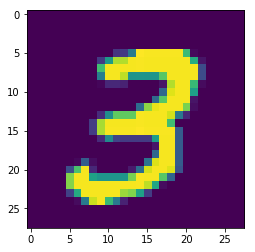

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[7])

In [7]:
y_train[7]

3

# reshaping 
(my favoutrite!)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train.shape[0]

60000

we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).

In [0]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [0]:
# converting to float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# making labels categorical
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
Y_train[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Define model architecture

In [0]:
model = Sequential()

In [30]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  """Entry point for launching an IPython kernel.


In [31]:
model.output_shape

(None, 32, 26, 26)

In [32]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [33]:
model.output_shape

(None, 32, 12, 12)

In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [35]:
model.output_shape

(None, 10)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.2067 - acc: 0.9383
Epoch 2/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0854 - acc: 0.9753
Epoch 3/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0650 - acc: 0.9801
Epoch 4/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0565 - acc: 0.9830
Epoch 5/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0505 - acc: 0.9848
Epoch 6/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0448 - acc: 0.9864
Epoch 7/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0394 - acc: 0.9877
Epoch 8/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0360 - acc: 0.9885
Epoch 9/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0337 - acc: 0.9895
Epoch 10/10
60000/60000 [==============================] - 17s 288us/step - loss: 

In [0]:
model.save('my_mnist_model.h5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [42]:
score

[0.03216203263477164, 0.9905]

# mistake analysis

In [0]:
test_pred= np.round(model.predict(X_test))

In [0]:
test_pred[73]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

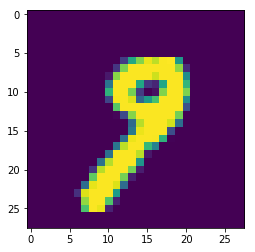

In [0]:
plt.imshow(X_test[73].reshape(28, 28))

In [0]:
np.argmax(test_pred,axis=1)== y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [0]:
mistakes_idx = np.where(np.argmax(test_pred,axis=1)!= y_test)
mistakes_idx

(array([ 247,  321,  445,  449,  582,  659,  720,  813,  844,  924,  947,
         965, 1014, 1033, 1039, 1112, 1226, 1232, 1247, 1260, 1299, 1319,
        1364, 1393, 1414, 1527, 1530, 1549, 1681, 1709, 1901, 2035, 2040,
        2053, 2129, 2130, 2135, 2182, 2237, 2266, 2293, 2406, 2414, 2462,
        2488, 2597, 2654, 2720, 2896, 2927, 2939, 2970, 3060, 3384, 3422,
        3520, 3558, 3778, 3780, 3808, 3853, 3893, 3906, 3941, 3985, 4078,
        4176, 4740, 4761, 4807, 4956, 5331, 5937, 5955, 6157, 6166, 6173,
        6505, 6555, 6571, 6576, 6597, 6625, 6740, 8059, 8094, 9009, 9015,
        9638, 9642, 9664, 9679, 9692, 9729, 9770, 9839]),)

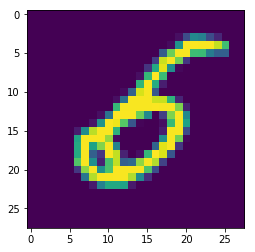

In [0]:
plt.imshow(X_test[9729].reshape(28, 28))

In [0]:
np.argmax(test_pred[9729])

6

In [0]:
y_test[9729]

5

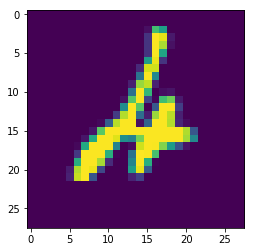

In [0]:
plt.imshow(X_test[247].reshape(28, 28))

In [0]:
np.argmax(test_pred[247])

6

(array([ 1.,  5., 11.,  5.,  7., 14.,  9.,  7., 12., 25.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

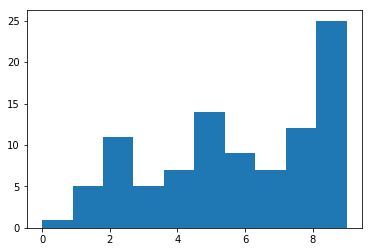

In [0]:
plt.hist(y_test[mistakes_idx],bins=10)

(array([18.,  8.,  6.,  8.,  9.,  7., 10., 18.,  9.,  3.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

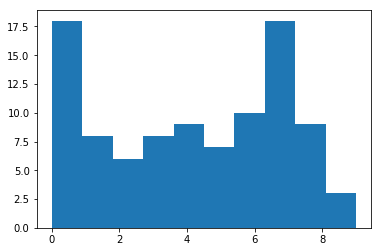

In [0]:
plt.hist(np.argmax(test_pred,axis=1)[mistakes_idx],bins=10)

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame([y_test[mistakes_idx],np.argmax(test_pred,axis=1)[mistakes_idx]]).transpose()
df.columns = ['label','prediction']

In [0]:
df = df.groupby('label').prediction.value_counts().reset_index(name = 'cnt')
df = df.pivot_table(index = 'label',columns = 'prediction',values = 'cnt')

In [0]:
import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)
s = df.fillna(0).style.background_gradient(cmap=cm)
s

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,2,0,1,1,0,0,0
2,1,3,0,0,1,0,1,5,0,0
3,0,0,0,0,0,2,0,2,1,0
4,0,0,0,0,0,0,5,0,0,2
5,3,0,0,5,0,0,3,1,2,0
6,5,2,0,0,1,1,0,0,0,0
7,1,2,3,0,0,0,0,0,1,0
8,3,1,3,0,1,0,0,3,0,1


# learning analysis

In [48]:
history.history.keys()

dict_keys(['loss', 'acc'])

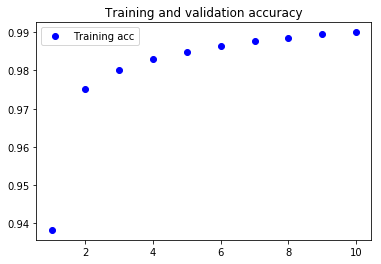

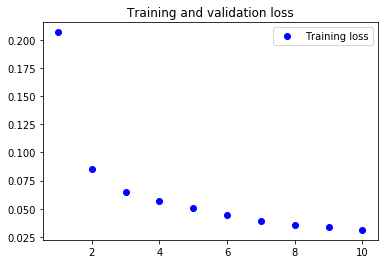

In [49]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:3]] 
# Extracts the outputs of the top 2 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [0]:
activations = activation_model.predict(X_test)

In [84]:
activations[1][0].shape

(32, 24, 24)

In [69]:
activations[0][0].shape

(32, 26, 26)

## CNN layer 1:

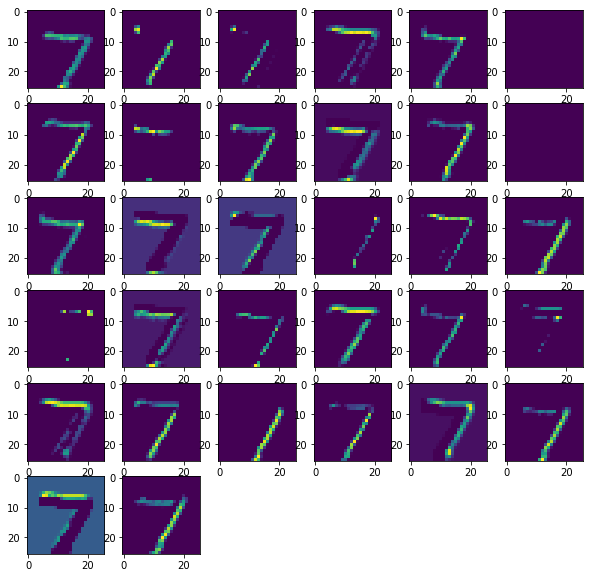

In [77]:
plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(activations[0][0][i])

## CNN layer 2:

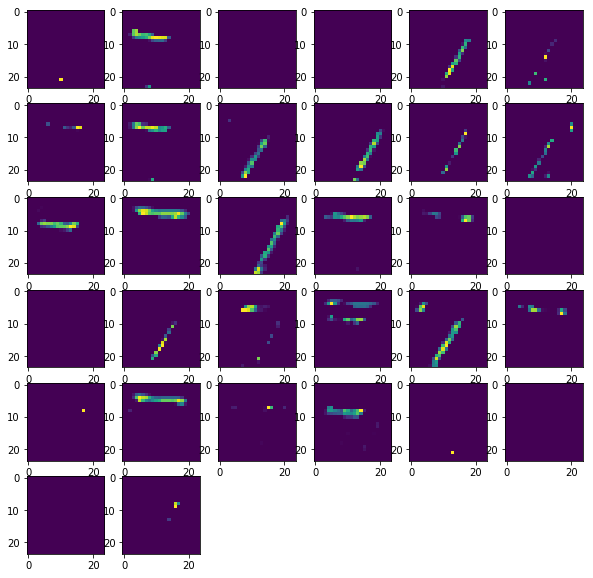

In [85]:
plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(activations[1][0][i])

## digit '9' version 1 - CNN level 2:

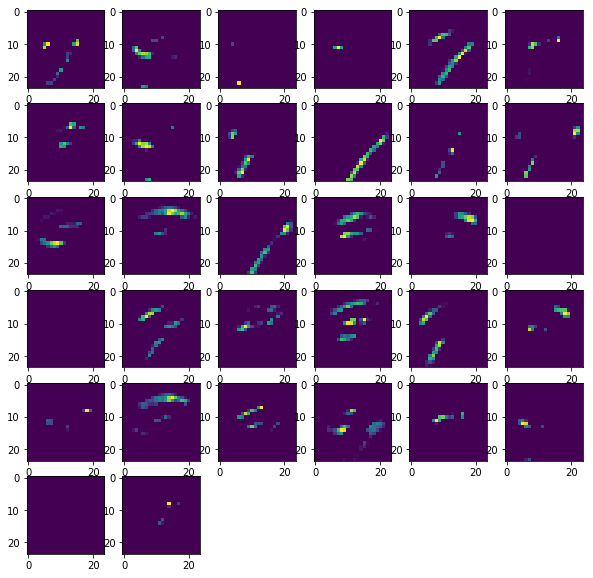

In [103]:
plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(activations[1][9][i])

## digit '9' version 2 - CNN level 2:

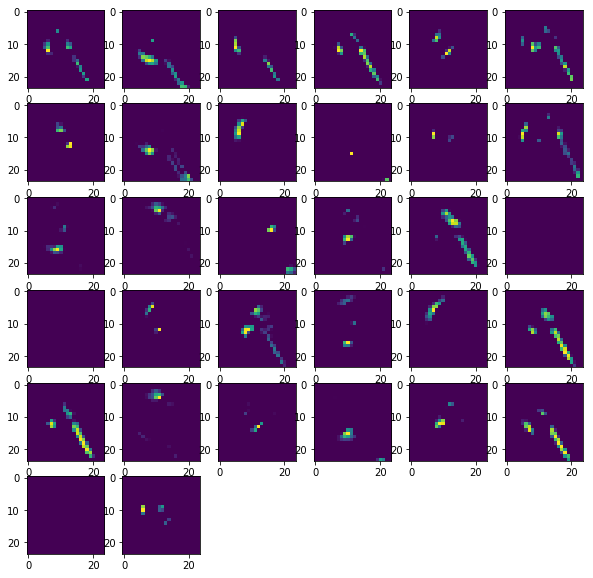

In [104]:
plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(activations[1][7][i])